<a href="https://colab.research.google.com/github/Lostkyd/ChatPDF/blob/main/Introvert%20and%20Extrovert%20Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [84]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
dataset = '/content/drive/MyDrive/Practice Dataset/Extrovert and Introvert Dataset/personality_dataset.csv'

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [87]:
# put your answer here
df = pd.read_csv(dataset)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Display the summary of all the features of the dataset using `.info()`

In [88]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Display the total number of samples from each label using `.value_counts()`

In [89]:
df.isnull().any().any()

np.True_

In [90]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [94]:
# put your answer here
df.value_counts()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  Drained_after_socializing  Friends_circle_size  Post_frequency  Personality
8.0               1           1.0                      0.0            1                          1.0                  0.0             Introvert      5
                                                                                                 5.0                  2.0             Introvert      5
7.0               1           0.0                      1.0            1                          1.0                  0.0             Introvert      4
8.0               1           2.0                      2.0            1                          1.0                  0.0             Introvert      4
10.0              1           2.0                      0.0            1                          3.0                  1.0             Introvert      4
                                                                                                                                                    ..
2.0               0           7.0                      3.0            0                          12.0                 3.0             Extrovert      1
                                                                                                 11.0                 7.0             Extrovert      1
                                                                                                 9.0                  7.0             Extrovert      1
                              6.0                      7.0            0                          14.0                 8.0             Extrovert      1
                              7.0                      4.0            0                          9.0                  4.0             Extrovert      1
Name: count, Length: 2098, dtype: int64

In [92]:
df = df.dropna()

Converting the Yes and No into boolean

In [93]:
cols = ['Stage_fear', 'Drained_after_socializing']

df[cols] = df[cols].replace({'Yes' : 1, 'No' : 0})

/tmp/ipython-input-3823132450.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({'Yes' : 1, 'No' : 0})


In [95]:
cols = ['Personality']

df[cols] = df[cols].replace({'Extrovert' : 1, 'Introvert' : 0})

/tmp/ipython-input-4137475893.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({'Extrovert' : 1, 'Introvert' : 0})


In [96]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2892,9.0,1,2.0,0.0,1,1.0,2.0,0
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

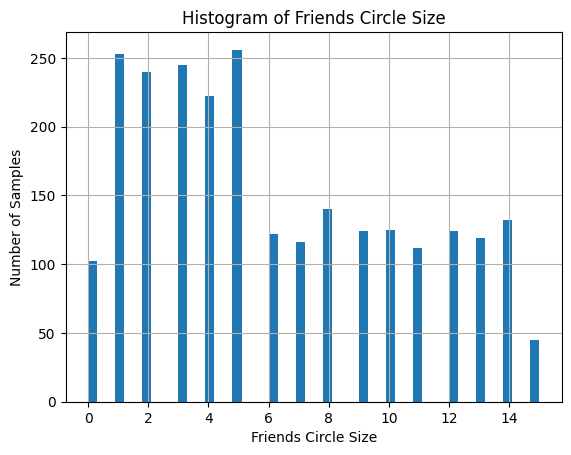

In [97]:
# put your answer here
df['Friends_circle_size'].hist(bins=50)

plt.xlabel('Friends Circle Size')
plt.ylabel('Number of Samples')
plt.title('Histogram of Friends Circle Size')

plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [71]:
# put your answer here

X = df.drop('Personality', axis=1).values

print(X)

[[ 4.  0.  4. ...  0. 13.  5.]
 [ 9.  1.  0. ...  1.  0.  3.]
 [ 9.  1.  1. ...  1.  5.  2.]
 ...
 [ 3.  0.  8. ...  0. 14.  9.]
 [ 4.  1.  1. ...  1.  4.  0.]
 [ 3.  0.  6. ...  0.  6.  9.]]


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [72]:
# put your answer here
y = df['Personality'].values

print(y)

[1 0 0 ... 1 0 1]


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [73]:
# put your answer here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the dimensions of each variables using `.shape()`

In [74]:
# put your answer here

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1981, 7)
X_test shape: (496, 7)
y_train shape: (1981,)
y_test shape: (496,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [75]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

Train the model using the `.fit()`

In [76]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [77]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

In [78]:
# put your answer here
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[234  16]
 [ 23 223]]


Display the accuracy

In [79]:
# put your answer here
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9213709677419355


Display the precision

In [80]:
# put your answer here
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.9330543933054394


Display the recall

In [81]:
# put your answer here
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.9065040650406504


Display the f1-score

In [82]:
# put your answer here
f1 = f1_score(y_test, y_pred)
print('F1-score:', f1)

F1-score: 0.9195876288659793


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [83]:
# put your answer here
my_features = [[4, 0, 4, 6, 0, 13, 5]]
prediction = knn.predict(my_features)
print("Predicted personality (0: Introvert, 1: Extrovert):", prediction[0])

Predicted personality (0: Introvert, 1: Extrovert): 1
